In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Task 3: Custom Segment using K-Mean cluster

In [2]:
import pandas as pd

data = pd.read_csv("processed_data.csv")

In [3]:
customer_segment_features = data.groupby("CustomerID")[["TotalValue", "Quantity"]].sum()

In [6]:
scaler = StandardScaler()

In [7]:
customer_segment_features_scaled = scaler.fit_transform(customer_segment_features)

In [8]:
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_segment_features_scaled)
    db_score = davies_bouldin_score(customer_segment_features_scaled, labels)
    db_scores.append(db_score)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [9]:
best_k = np.argmin(db_scores) + 2  # Best cluster count

In [10]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)

In [11]:
final_labels = final_kmeans.fit_predict(customer_segment_features_scaled)
customer_segment_features["Cluster"] = final_labels

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


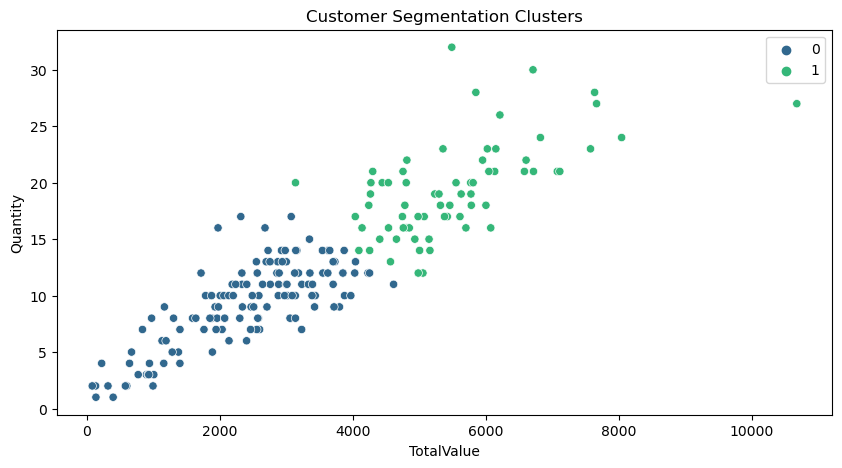

In [12]:
# Visualizing Clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x=customer_segment_features["TotalValue"], y=customer_segment_features["Quantity"], hue=final_labels, palette="viridis")
plt.title("Customer Segmentation Clusters")
plt.show()

In [15]:
# Saving results
customer_segment_features.to_csv("FirstName_LastName_Clustering.pdf")

In [16]:
print(f"Optimal Clusters: {best_k}")
print(f"Davies-Bouldin Index: {min(db_scores)}")

Optimal Clusters: 2
Davies-Bouldin Index: 0.6292070774536709


In [19]:
data.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [20]:
# Train test split
features = data.groupby("CustomerID")[["Quantity", "Price_x"]].sum()
target = data.groupby("CustomerID")["TotalValue"].sum()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

In [22]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = np.sqrt(dt_mse)

In [23]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

In [24]:
# Visualizing Model Performance for comparision
metrics = ["MAE", "MSE", "RMSE"]
lr_scores = [lr_mae, lr_mse, lr_rmse]
dt_scores = [dt_mae, dt_mse, dt_rmse]
rf_scores = [rf_mae, rf_mse, rf_rmse]


In [58]:
score_plot=[lr_scores,dt_scores,rf_scores]

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

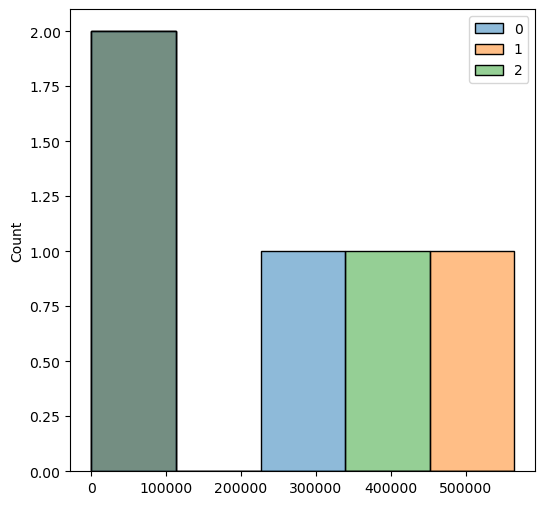

In [59]:
plt.figure(figsize=(6,6))
sns.histplot(score_plot)
plt.show

In [25]:
x = np.arange(len(metrics))
width = 0.25

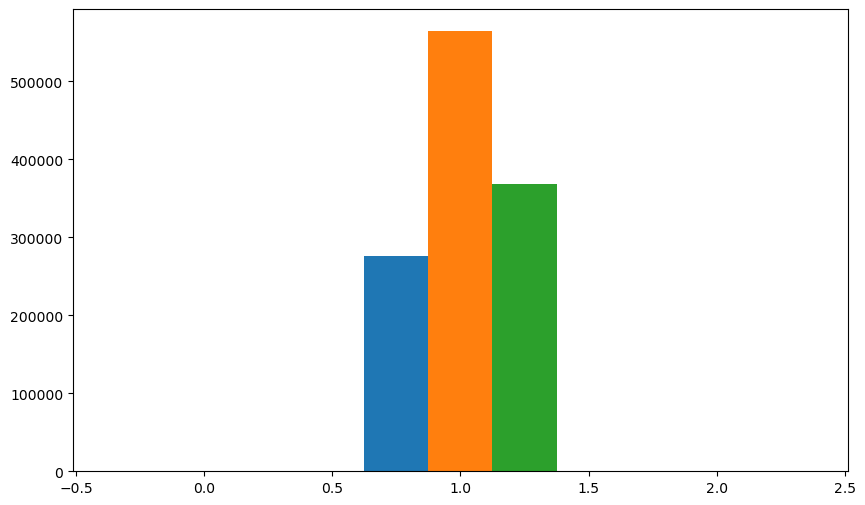

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, lr_scores, width, label='Linear Regression')
rects2 = ax.bar(x, dt_scores, width, label='Decision Tree')
rects3 = ax.bar(x + width, rf_scores, width, label='Random Forest')

In [52]:
ax.set_xlabel("Error Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
# plt.show()

In [50]:
print("Linear Regression - | MAE:", lr_mae, "| MSE:", lr_mse, " | RMSE:", lr_rmse)
print('__________________________________________________________________________________________________')
print("Decision Tree     - | MAE:", dt_mae, " |  MSE:", dt_mse, "| RMSE:", dt_rmse)
print('__________________________________________________________________________________________________')
print("Random Forest     - | MAE:", rf_mae, " |  MSE:", rf_mse, "| RMSE:", rf_rmse)

Linear Regression - | MAE: 425.64309798159536 | MSE: 276323.1482138868  | RMSE: 525.6644825493604
__________________________________________________________________________________________________
Decision Tree     - | MAE: 662.7677499999999  |  MSE: 564191.9398724999 | RMSE: 751.1271129925346
__________________________________________________________________________________________________
Random Forest     - | MAE: 511.9835224999999  |  MSE: 368319.1478786119 | RMSE: 606.8930283654706
